<a href="https://colab.research.google.com/github/davis689/binder/blob/master/CHEM452/Theories_of_rate_constants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theories of Rate Constants
We have thus far used rate constants without questioning their magnitude. We remedy this oversight here.

## Arrhenius Equation
[Svante Arrhenius](https://en.wikipedia.org/wiki/Svante_Arrhenius) came up with an equation for calculating rate constants in 1889. It is related to the van 't Hoff equation for the temperature dependence of the equilibrium constant. Called the [Arrhenius equation](https://en.wikipedia.org/wiki/Arrhenius_equation), it is taught in general chemistry and introduces the concept of activation energy.
$$k=Ae^{-E_a/k_BT}$$

One can think of $A$ as the frequency of *attempts* at reaction and the exponential as the fraction of attempts that have sufficient energy to react. 

The Arrhenius equation has vast applicability to chemical reactions and has been applied to frequencies of cricket chirps and other phenomena of biological orgins. Regardless of Arrhenius' work to connect his work to theory, today we usually consider the equation to be empirical.

$$\require{mhchem}$$  

## Collision theory
Collision theory is based on the simple idea that a collision is necessary to cause a reaction. Let's use this idea to successively more accurately calculate the rate of an elementary step $$\ce{A + B -> P}$$

**Assumption 1:**
Assume every collision leads to reaction.

This would mean that the rate is equal to the collision frequency.

$\begin{align*}-\dfrac{d[A]}{dt}&=k[A][B]\\&=Z_{AB}=\dfrac{N_A}{V}\dfrac{N_B}{V}\sigma\left(\dfrac{8k_BT}{\pi\mu}\right)^\frac{1}{2}\\&=\sigma \left<v_r\right>[A][B]\end{align*}$

In this scenario, the rate constant would be the cross-sectional area multiplied by the average relative velocity.
$$k=\sigma\left<v_r\right>$$

Is it reasonable that *all* collisions lead to a reaction?

It seems that our assumption is too generous. We need to exclude collisions that are not energetic enough.

**Assumption 2:** Assume every collision *with sufficient $v_r$* leads to collision.

We can start over with our new assumption or we can modify our previous result to fit our new assumption. Let's do the latter. 

Our previous result includes the cross-sectional area as well as the average relative velocity. What if we imagined that the cross-sectional area is a function of velocity. Not actually but conceptually. We could imagine that the effective cross-sectional area of our molecule is zero if it's not colliding with sufficient energy. It's *as if* our molecule has no size for the purpose of the reaction rate if its relative velocity is too small.

$$k=\sigma(v_r)v_r$$

Now that makes things difficult since every molecule gets a different $k$. Instead of worrying about each different $k$, let's calculate an average $k$.

$$\left<k\right>=\int^\infty_0 k(v_r) f(v_r) dv_r $$

$f(v_r)$ is the Maxwell-Boltzmann distribution. $\sigma(v_r)$ is 0 if $v_r<v_o$ and $\sigma(v_r)=\sigma$ otherwise.

Let's calculate this average k.

In [ ]:
import sympy as sp
sp.init_printing()
kb=sp.symbols('k_B',positive=True, constant=True)
vr,vo,T,mu,sigma,Eo=sp.symbols('v_r v_o T mu sigma E_o',positive=True)

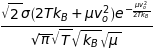

In [ ]:
sp.integrate(sigma*vr*sp.sqrt(mu/(2*sp.pi*kb*T))**3*4*sp.pi*vr**2*sp.exp(-mu*vr**2/(2*kb*T)),(vr,vo,sp.oo)).simplify()

Let's change from velocity to kinetic energy where $E_o$ corresponds to the energy at $v_o$.

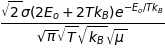

In [ ]:
_.subs(vo**2,2*Eo/mu)

Rearranged this gives us 
$$ \begin{align*}
\left<k\right>&=\left[\sigma \left(\dfrac{8k_BT}{\pi \mu}\right)^{1/2}\left(\dfrac{E_o}{k_B T}+1\right)\right]e^{-\frac{E_o}{k_BT}}\\
&=\left[\sigma \left<v_r\right>\left(\dfrac{E_o}{k_B T}+1\right)\right]e^{-\frac{E_o}{k_BT}}\end{align*} $$

This gets us something very Arrhenius-like. The exponential is just like Arrhenius if the $E_o$ is $E_a$. The bracketed factor is not a constant as in Arrhenius but its temperature dependence is quite weak having both $\sqrt T$ and 1/$\sqrt T$ dependent terms.

The relative velocity in this treatement does not take into account direct hits vs. glancing blows. That is our next correction.

**Assumption 3:** Assume every collision *with sufficient $v_{lc}$* leads to collision.

This is very similar to the previous assumption but we replace relative velocity which just takes into account the velocity in the direction of the collision with velocity directed along the line between the centers of the two molecules.

In the diagram we have a molecule A moving to the right to hit a molecule B. The vector connecting the line-of-centers is at an angle $\alpha$ to the direction of travel. As $\alpha$ approaches 0, the collision is more head-on.
The parameter $b_{max}$ is the sum of the molecular radius. $b$ is the distance between lines going through the centers and parallel to the direction of travel of molecule A (we can imagine B to be stationary). If $\alpha=90^\circ$, then $b_{max}=b$ and if $\alpha=0^\circ$ then $b$=0. So as with $\alpha$ if $b$ is smaller, the collision is more direct.

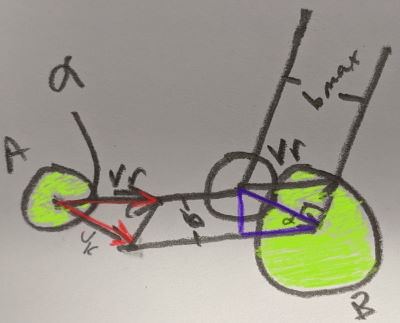



The relative velocity and the velocity directed between the line-of-centers are connected by $v_r=v_{lc}\mathrm{cos}\alpha$. The purple triangle can be used to show that $\mathrm{sin}\alpha=\frac{b}{b_{max}}$. The connection between $sin$ and $cos$ can be used along with these relations to show that $v_{lc}=v_r\sqrt{1-\frac{b^2}{b_{max}^2}}$

If we place some maximum limit on $b$ corresponding to a minimum $v_{lc}$for successful reactions, $b_o$, we can write  $v_{o}=v_r\sqrt{1-\frac{b_o^2}{b_{max}^2}}$ where $v_o$ is the minimum relative velocity along the line-of-centers that will lead to a reaction.

Solving for $b_o$ gives $$b_{o}=b_{max}\sqrt{1-\frac{v_r^2}{v_{o}^2}}$$ Our actual collision cross section is $\sigma = \pi b_{max}^2$. Since $b_o$ is the effective collision radius, the *effective* collision cross-section is then $$\sigma_e=\pi b_o^2=\pi b_{max}^2\left(1-\frac{v_r^2}{v_o^2}\right)=\sigma\left(1-\frac{v_r^2}{v_o^2}\right)$$. We now use this as our $\sigma$ in the integral for average $k$ as we did in assumption 2. 

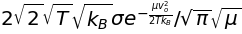

In [ ]:
sp.integrate(sigma*(1-vo**2/vr**2)*vr*sp.sqrt(mu/(2*sp.pi*kb*T))**3*4*sp.pi*vr**2*sp.exp(-mu*vr**2/(2*kb*T)),(vr,vo,sp.oo)).simplify()

Substituting kinetic energy for velocity gives

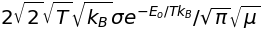

In [ ]:
_.subs(vo**2,2*Eo/mu) # _ means previous result. .subs means substitute the second expression for the first.

Which can be rewritten as $$\left<k\right>=\left[\sigma \left(\dfrac{8k_bT}{\pi \mu}\right)^{1/2}\right]e^{-\frac{E_o}{k_BT}}=\left[\sigma \left<v_r\right>\right]e^{-\frac{E_o}{k_BT}}$$


This version is decreased from the previous assumption by the factor $$\left(\dfrac{E_o}{k_B T}+1\right)$$ but is likely to still be too big for any but atom-atom reactions.


**Assumption 4:** Assume every collision with sufficient $v_{lc}$ leads to collision *if the orientation is correct*.

We will not try to derive anything here but simply multipy by the fraction of the surface that is active to reaction, *P*.

$$\left<k\right>=\left[P\left<v_r\right>\sigma\right]e^{-E_o/kT}$$ 

$P$ is likely to be much smaller than 1 for most reactions but there are [rare mechanisms](https://en.wikipedia.org/wiki/Harpoon_reaction) for which this is not true.

$$\require{mhchem}$$  

## Transition State Theory/Activated Complex Theory

There's another theory that gives a different and complementary view of rate constants. It takes into account more than the activation energy but comes at a cost of a bit more complexity. The mechanism is

$$\ce{A + B <=>[k_1][k_{-1}] AB^{\ddagger} ->[k_2] P}$$

Here $AB^\ddagger$ refers to a transition-state not an intermediate as is usual with mechanisms. The rate will be $$\dfrac{d[P]}{dt}=k_2[AB^\ddagger]$$

We will treat the first step as a true equilibrium between the reactants and the transition state. So that $k_1[A][B]=k_{-1}[AB^\ddagger]$ and therefore $[AB^\ddagger]=\frac{k_1}{k_{-1}}[A][B]$ so that $$\dfrac{d[P]}{dt}=k_2\dfrac{k_1}{k_{-1}}[A][B]$$

This means that the overall rate constant for the reaction is $k=k_2\dfrac{k_1}{k_{-1}}$. Now we need to unpack the meaning of that collection of rate constants. 

Because AB$^\ddagger$ is the transition-state, the rate constant $k_2$ is the frequency of the vibrational mode that leads to the product, $v^\ddagger$. 

The ratio $\dfrac{k_1}{k_{-1}}$ is the equilibrium constant, $K^\ddagger$, for the equilibrium step.

$$\dfrac{k_1}{k_{-1}}=K^\ddagger=\dfrac{q^\ddagger}{q_Aq_B}e^{-\varepsilon^*/k_BT}$$
where $q$ is the partition function for each reactant and transition-state and $\varepsilon^*$ is the energy difference between reactants and transition-state.

The partition function, in general, can be pulled apart into terms for each energy type/mode of motion. For example, $q_A=q_Tq_Rq_Vq_E$ for translational, rotational, vibrational, and electronic motion. In a similar way, we can separate vibrational modes. We'll separate out the one mode from $q^\ddagger$ that leads to formation of product whose frequency we named $v^\ddagger$ above.

$$q^\ddagger= q_{k_2}q'^\ddagger$$

Vibrational partition functions in the harmonic oscillator approximation can be written as $$q_{k_2}=\dfrac{1}{1-e^{-\dfrac{hv^\ddagger}{k_bT}}}\approx\dfrac{1}{1-1-{\dfrac{hv^\ddagger}{k_bT}}...}=\dfrac{k_BT}{hv^\ddagger}$$

Putting all this together, we find $$k=v^\ddagger\dfrac{k_BT}{hv^\ddagger}\dfrac{q'^\ddagger}{q_Aq_B}e^{-\frac{\varepsilon^\ddagger}{k_BT}}=\dfrac{k_BT}{h}K'^\ddagger e^{-\frac{\varepsilon^\ddagger}{k_BT}}$$

The equilibrium constant (including the exponential correction for the difference in energy between A+B and AB$^\ddagger$) can be written in terms of Gibbs energy using $\Delta G'^\ddagger=-RTlnK'^\ddagger$
$$k=v^\ddagger\dfrac{k_BT}{hv^\ddagger} e^{\frac{\Delta S'^\ddagger}{T}}e^{-\frac{\Delta H'^\ddagger}{RT}}$$

The relation between enthalpy and energy is $\Delta H=\Delta E + \Delta PV$.
For ideal gases we can write $\Delta H=\Delta E+\Delta nRT$. The $\Delta n$ will be different for unimolecular gas phase reactions than for bimolecular gas phase reactions. This will lead to an additional factor of $e^1$ or $e^2$.